# Análise Experimento 5

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

caminho_csv = './resultados_experimento5MOCADO.csv'

df = pd.read_csv(caminho_csv)

df["tempo_execucao_min"] = df["tempo_execucao_s"] / 60

df.head()

,n,pop_size,geracoes,elite_rate,mutation_rate,melhor_solucao,melhor_custo,tempo_execucao_s,geracao_melhor_custo,configuracao,elitism,selection,crossover,mutation,tempo_execucao_min
0,10,100,100,0.2,0.1,[8 6 4 1 9 3 2 0 7 5],54471.0,0.492678,2,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap,0.008211
1,10,100,100,0.2,0.1,[7 2 0 9 5 1 6 3 8 4],53194.0,0.613935,39,"{'selection': 'roulette', 'crossover': 'cx', '...",simple,roulette,cx,insertion,0.010232
2,10,100,100,0.2,0.1,[8 6 4 1 9 3 2 0 7 5],54471.0,0.623738,23,"{'selection': 'roulette', 'crossover': 'cx', '...",simple,roulette,cx,swap,0.010396
3,10,100,100,0.2,0.1,[2 8 0 9 5 1 6 3 7 4],52527.0,0.558436,19,"{'selection': 'tournament', 'crossover': 'mpx'...",tournament,tournament,mpx,swap,0.009307
4,20,100,100,0.2,0.1,[ 8 9 15 5 7 14 18 12 11 1 16 4 2 3 13 ...,312655.0,1.136412,91,"{'selection': 'tournament', 'crossover': 'cx',...",simple,tournament,cx,swap,0.018940


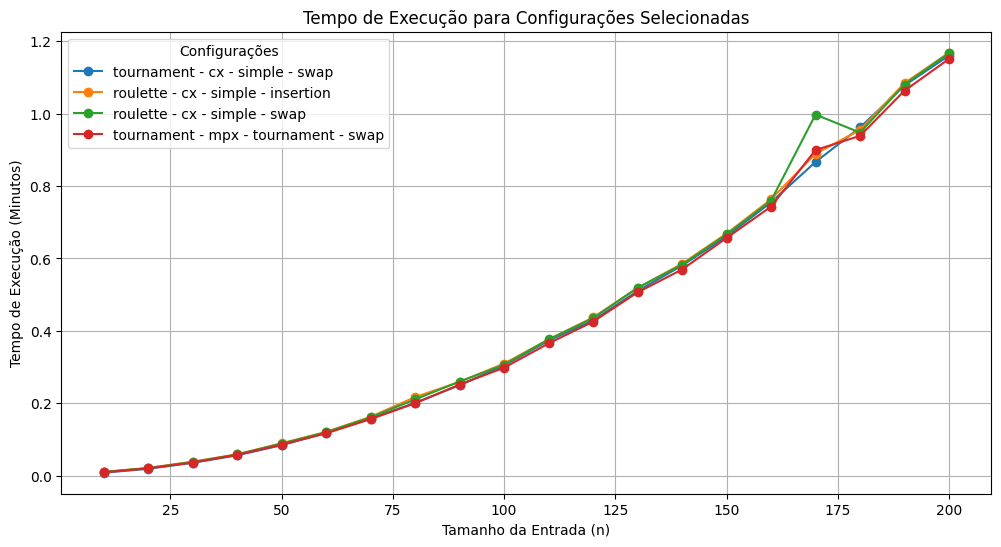

In [121]:
# Lista das melhores configurações dos experimentos de 1-4
configurations = [
    {"selection": "tournament", "crossover": "cx", "elitism": "simple", "mutation": "swap"},
    {"selection": "roulette", "crossover": "cx", "elitism": "simple", "mutation": "insertion"},
    {"selection": "roulette", "crossover": "cx", "elitism": "simple", "mutation": "swap"},
    {"selection": "tournament", "crossover": "mpx", "elitism": "tournament", "mutation": "swap"}
]

config_df = pd.DataFrame(configurations)

df_filtered = df.merge(config_df, on=["selection", "crossover", "elitism", "mutation"])

# Fazendo a média do tempo de execução por configuração e por cada N
grouped = df_filtered.groupby(["n", "selection", "crossover", "elitism", "mutation"])["tempo_execucao_min"].mean().reset_index()

plt.figure(figsize=(12, 6))

for config in configurations:
    subset = grouped[
        (grouped["selection"] == config["selection"]) &
        (grouped["crossover"] == config["crossover"]) &
        (grouped["elitism"] == config["elitism"]) &
        (grouped["mutation"] == config["mutation"])
    ]
    label = f"{config['selection']} - {config['crossover']} - {config['elitism']} - {config['mutation']}"
    plt.plot(subset["n"], subset["tempo_execucao_min"], marker="o", linestyle="-", label=label)

plt.xlabel("Tamanho da Entrada (n)")
plt.ylabel("Tempo de Execução (Minutos)")
plt.title("Tempo de Execução para Configurações Selecionadas")
plt.legend(title="Configurações")
plt.grid(True)
plt.show()


In [122]:
# Fazendo a média do tempo de execução por configuração
grouped = df.groupby(["elitism", "selection", "crossover", "mutation"])["tempo_execucao_min"].mean().reset_index()

# Encontrando a melhor configuração
best_config = grouped.loc[grouped["tempo_execucao_min"].idxmin()]

print("Tempo médio em minutos por configuração ordenado pelo tempo:")
print(grouped.sort_values(by='tempo_execucao_min'))

print("\nMelhor configuração:")
print(best_config)

Tempo médio em minutos por configuração ordenado pelo tempo:
      elitism   selection crossover   mutation  tempo_execucao_min
3  tournament  tournament       mpx       swap            0.427374
2      simple  tournament        cx       swap            0.430314
0      simple    roulette        cx  insertion            0.436548
1      simple    roulette        cx       swap            0.440144

Melhor configuração:
elitism               tournament
selection             tournament
crossover                    mpx
mutation                    swap
tempo_execucao_min      0.427374
Name: 3, dtype: object


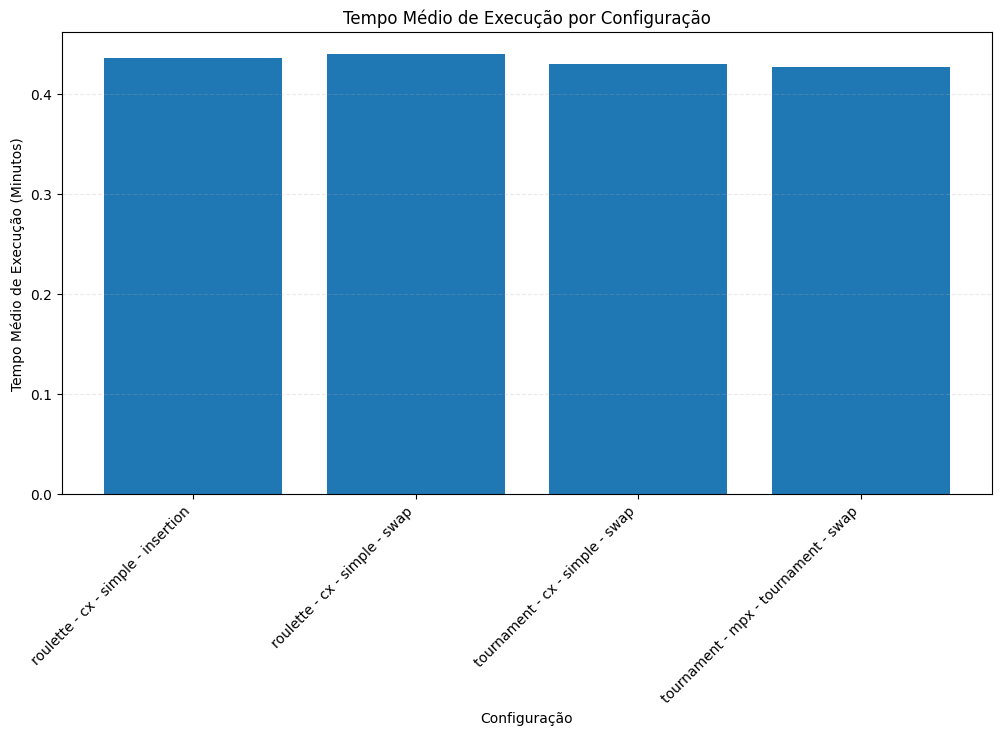

In [123]:
plt.figure(figsize=(12, 6))
plt.bar(grouped["selection"] + " - " + grouped["crossover"] + " - " + grouped["elitism"] + " - " + grouped["mutation"], 
        grouped["tempo_execucao_min"])

plt.ylabel("Tempo Médio de Execução (Minutos)")
plt.xlabel("Configuração")
plt.title("Tempo Médio de Execução por Configuração")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.25)
plt.show()